# Data Exploration

In [1]:
import numpy as np
import pandas as pd
from MemoryAutoScaling.Analysis import TraceAnalyzer
from MemoryAutoScaling import utils

In [2]:
DATA_PATH = "/Users/mattb/Desktop/Courses/MemoryAutoScaling/data/task_usage_df"

df_1298 = pd.read_csv("{}1298.csv".format(DATA_PATH)).drop(columns=['Unnamed: 0'])
df_1925 = pd.read_csv("{}1925.csv".format(DATA_PATH)).drop(columns=['Unnamed: 0'])

In [3]:
order = df_1298['start_time'].sort_values().index
df_1298 = df_1298.loc[order]

order = df_1925['start_time'].sort_values().index
df_1925 = df_1925.loc[order]

In [4]:
avg_1298 = utils.extract_time_series_from_trace(df_1298, "average_usage.memory")

avg_1925 = utils.extract_time_series_from_trace(df_1925, "average_usage.memory")

max_1298 = utils.extract_time_series_from_trace(df_1298, "maximum_usage.memory")

max_1925 = utils.extract_time_series_from_trace(df_1925, "maximum_usage.memory")

### Analyzing Raw Traces

In this section we analyze the raw trace data before applying any transformations. We first look at the average usage data.

##### Average Usage

In [5]:
analyzer = TraceAnalyzer("whitegrid", "seaborn-dark", 10, "blue", "Raw Data")

In [6]:
print("Trace 1298 Average Memory Usage Statistics")
analyzer.calculate_statistics(avg_1298)

Trace 1298 Average Memory Usage Statistics


std       0.001717
range     0.019775
IQR       0.001099
median    0.017975
avg       0.017768
dtype: float64

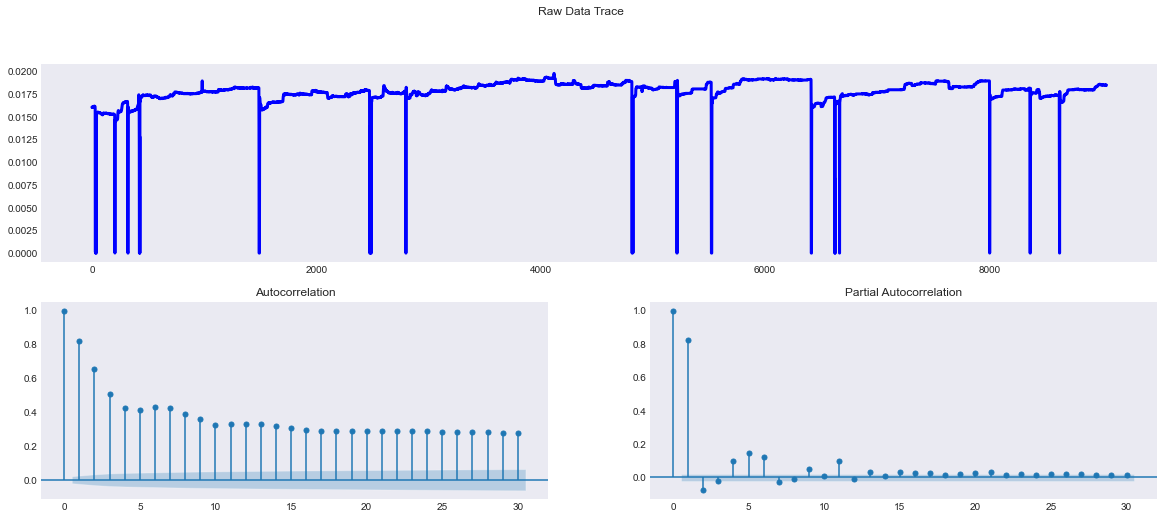

In [7]:
analyzer.plot_auto_correlations(avg_1298, 30)

In [8]:
print("Trace 1925 Average Memory Usage Statistics")
analyzer.calculate_statistics(avg_1925)

Trace 1925 Average Memory Usage Statistics


std       0.000143
range     0.000726
IQR       0.000072
median    0.000059
avg       0.000090
dtype: float64

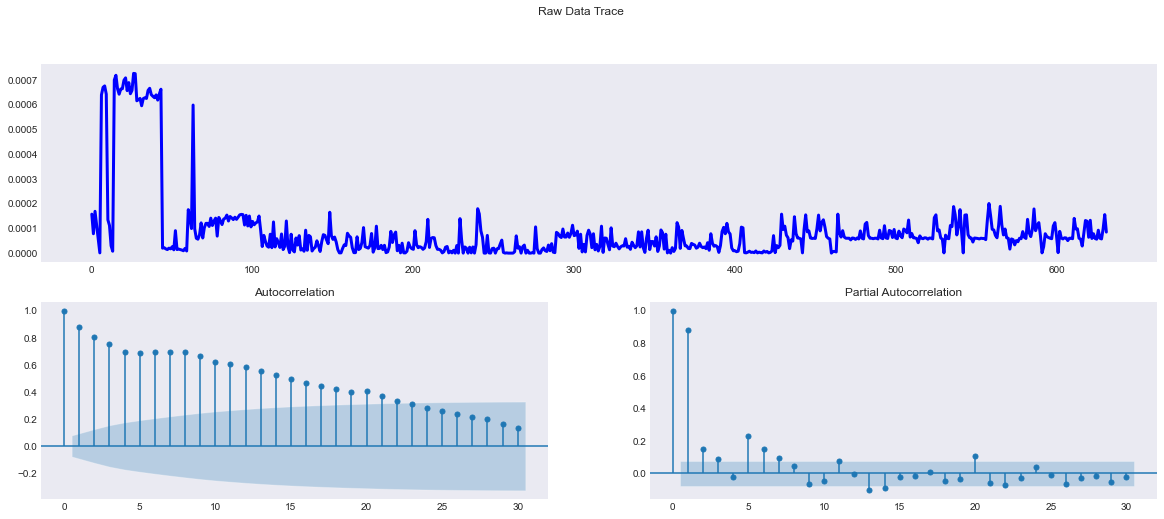

In [9]:
analyzer.plot_auto_correlations(avg_1925, 30)

##### Maximum Usage

In [10]:
print("Trace 1298 Maximum Memory Usage Statistics")
analyzer.calculate_statistics(max_1298)

Trace 1298 Maximum Memory Usage Statistics


std       0.001689
range     0.019989
IQR       0.001068
median    0.017975
avg       0.017800
dtype: float64

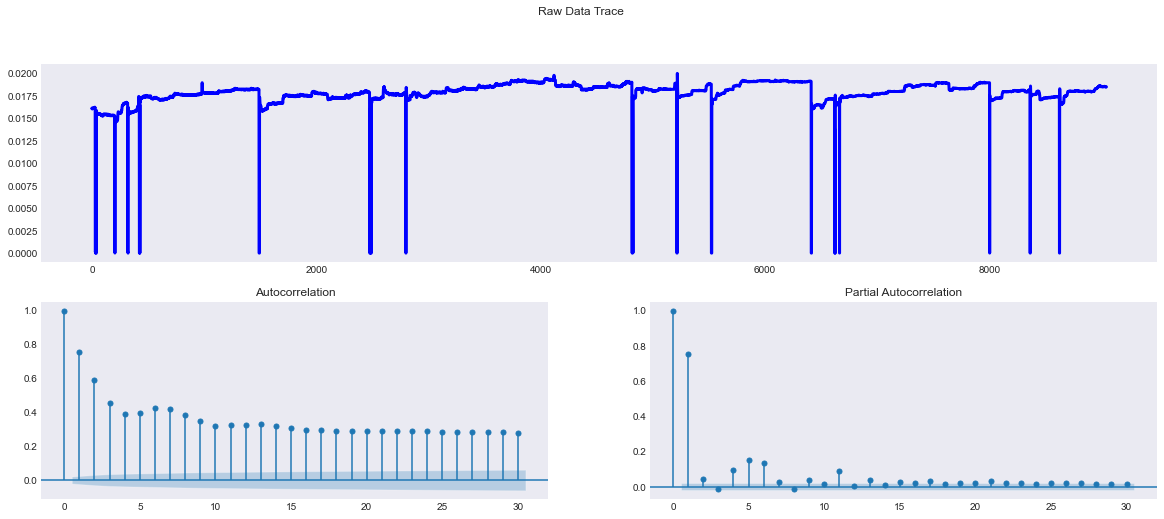

In [11]:
analyzer.plot_auto_correlations(max_1298, 30)

In [12]:
print("Trace 1925 Maximum Memory Usage Statistics")
analyzer.calculate_statistics(max_1925)

Trace 1925 Maximum Memory Usage Statistics


std       0.000209
range     0.001310
IQR       0.000159
median    0.000097
avg       0.000187
dtype: float64

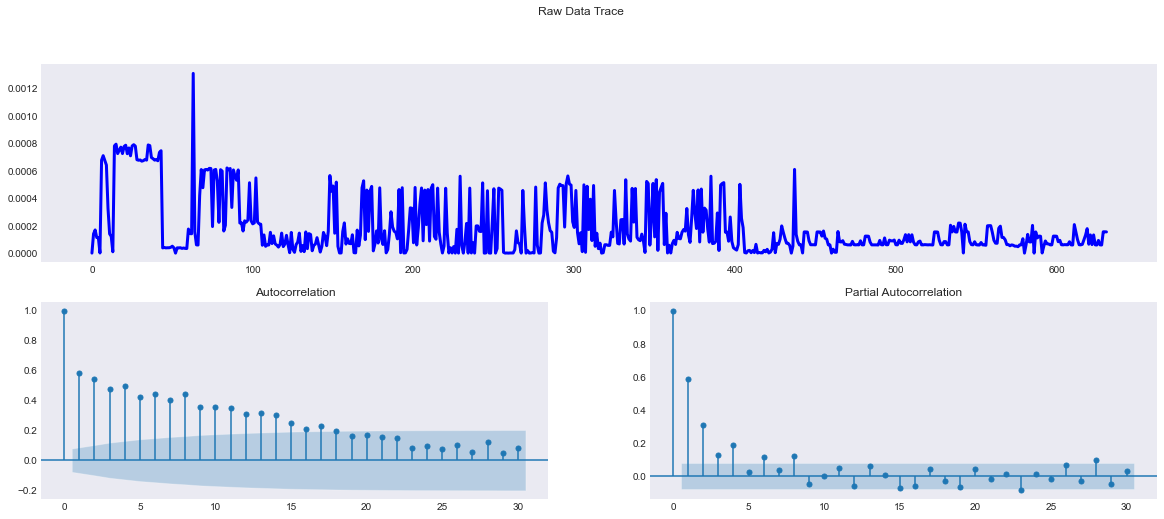

In [13]:
analyzer.plot_auto_correlations(max_1925, 30)

### Differenced Traces

In [14]:
def get_differenced_stats(raw_trace, diffs, trace_analyzer):
    return pd.DataFrame({"Raw": trace_analyzer.calculate_statistics(raw_trace),
                         "Differenced": trace_analyzer.calculate_statistics(diffs)})

##### Average Usage

In [15]:
print("Trace 1298 Average Memory Usage Statistics")
get_differenced_stats(avg_1298, np.diff(avg_1298, 1), analyzer)

Trace 1298 Average Memory Usage Statistics


,Raw,Differenced
std,0.001717,1.021312e-03
range,0.019775,3.513050e-02
IQR,0.001099,0.000000e+00
median,0.017975,0.000000e+00
avg,0.017768,2.700073e-07


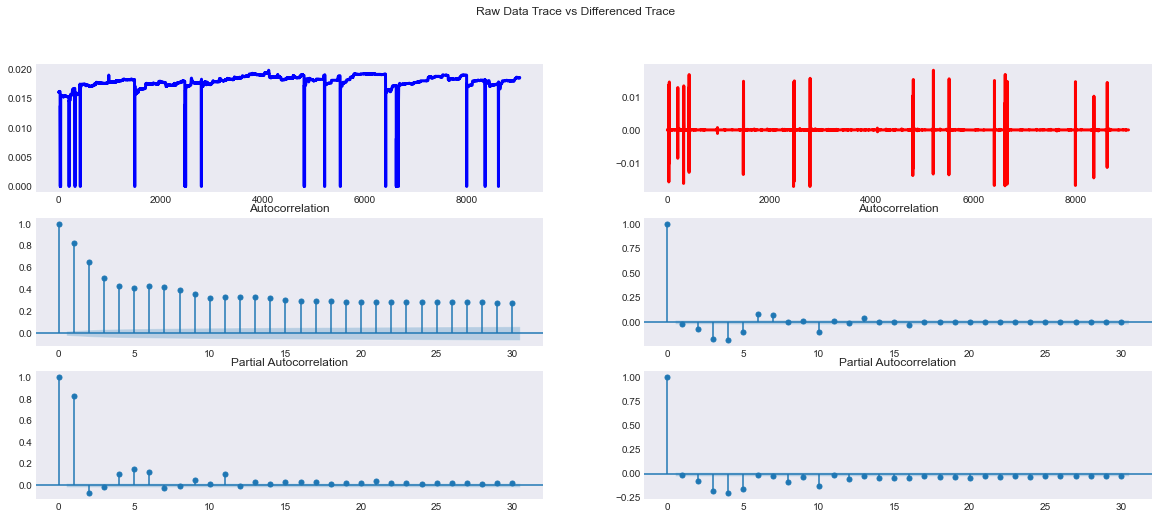

In [16]:
analyzer.plot_differenced_auto_correlations(avg_1298, 30)

In [17]:
print("Trace 1925 Average Memory Usage Statistics")
get_differenced_stats(avg_1925, np.diff(avg_1925, 1), analyzer)

Trace 1925 Average Memory Usage Statistics


,Raw,Differenced
std,0.000143,7.039813e-05
range,0.000726,1.333237e-03
IQR,0.000072,3.862381e-05
median,0.000059,-1.907349e-06
avg,0.000090,-1.148641e-07


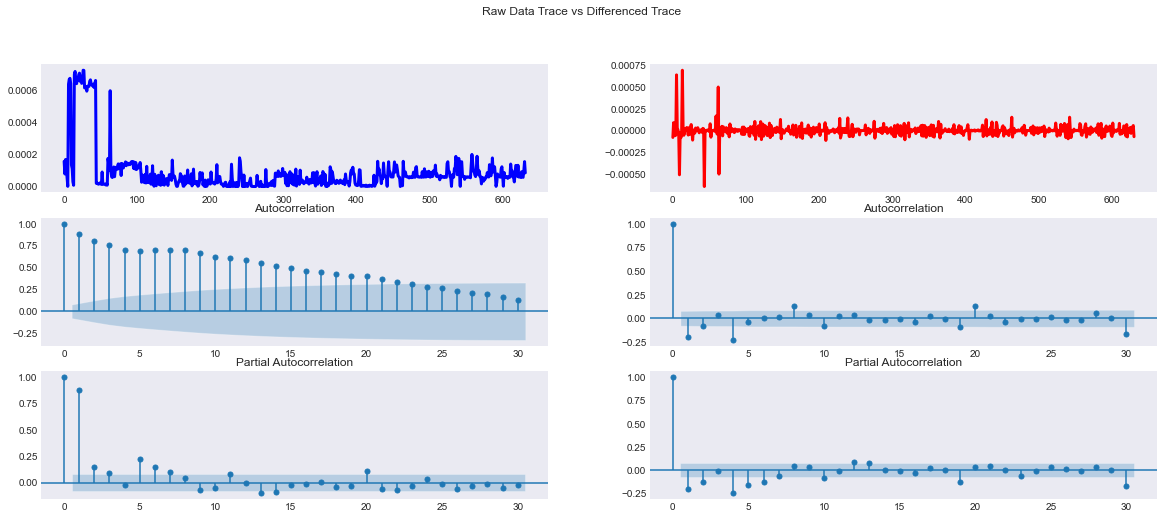

In [18]:
analyzer.plot_differenced_auto_correlations(avg_1925, 30)

##### Maximum Usage

In [19]:
print("Trace 1298 Maximum Memory Usage Statistics")
get_differenced_stats(max_1298, np.diff(max_1298, 1), analyzer)

Trace 1298 Maximum Memory Usage Statistics


,Raw,Differenced
std,0.001689,1.182617e-03
range,0.019989,3.908157e-02
IQR,0.001068,0.000000e+00
median,0.017975,0.000000e+00
avg,0.017800,2.666322e-07


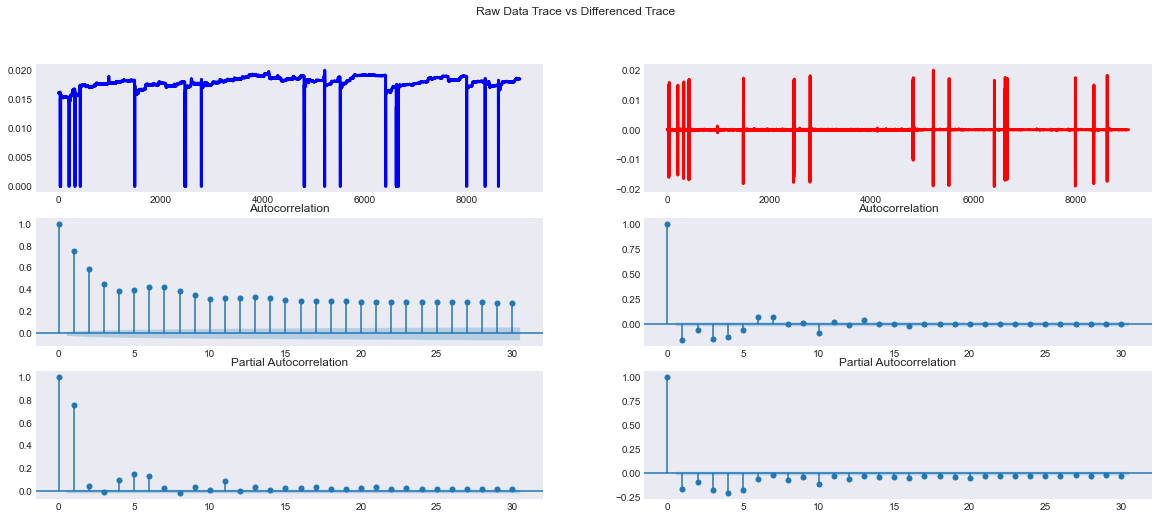

In [20]:
analyzer.plot_differenced_auto_correlations(max_1298, 30)

In [21]:
print("Trace 1925 Maximum Memory Usage Statistics")
get_differenced_stats(max_1925, np.diff(max_1925, 1), analyzer)

Trace 1925 Maximum Memory Usage Statistics


,Raw,Differenced
std,0.000209,1.905894e-04
range,0.001310,2.325058e-03
IQR,0.000159,8.869171e-05
median,0.000097,-9.536743e-07
avg,0.000187,2.448419e-07


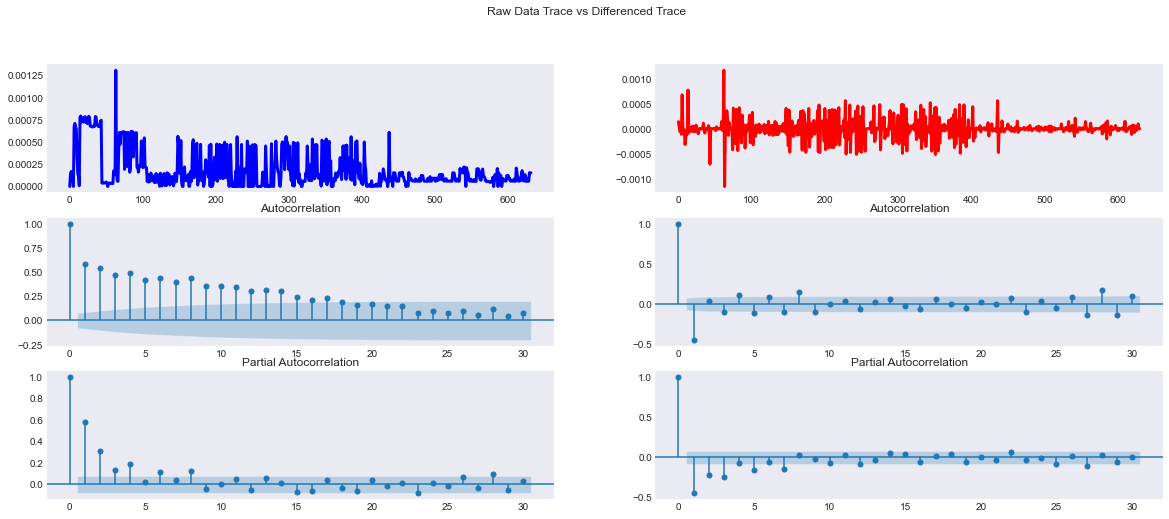

In [22]:
analyzer.plot_differenced_auto_correlations(max_1925, 30)

### Correlations

In this section we investigate the relationship between our target variable and some of the other variables in the trace datasets. Our primary focus will be maximum memory usage so we will use that as our target variable

In [23]:
# list of time series variables to test for correlation
feature_vars = ['assigned_memory', 'page_cache_memory', 'average_usage.cpus', 'average_usage.memory', 'maximum_usage.cpus']

# and the target variable
target_var = 'maximum_usage.memory'

In [24]:
features_1298 = df_1298[feature_vars + [target_var]]
features_1925 = df_1925[feature_vars + [target_var]]

We start by looking at base correlation

In [25]:
features_1298.corr()

,assigned_memory,page_cache_memory,average_usage.cpus,average_usage.memory,maximum_usage.cpus,maximum_usage.memory
assigned_memory,1.000000,-0.220665,-0.208663,0.378292,-0.047107,0.380354
page_cache_memory,-0.220665,1.000000,0.133030,-0.043595,0.029938,-0.048194
average_usage.cpus,-0.208663,0.133030,1.000000,0.162966,0.594032,0.157042
average_usage.memory,0.378292,-0.043595,0.162966,1.000000,0.101282,0.990853
maximum_usage.cpus,-0.047107,0.029938,0.594032,0.101282,1.000000,0.098087
maximum_usage.memory,0.380354,-0.048194,0.157042,0.990853,0.098087,1.000000


In [26]:
features_1925.corr()

,assigned_memory,page_cache_memory,average_usage.cpus,average_usage.memory,maximum_usage.cpus,maximum_usage.memory
assigned_memory,1.000000,0.557589,0.210939,0.374758,0.113035,0.236823
page_cache_memory,0.557589,1.000000,0.231103,0.406554,0.252346,0.376168
average_usage.cpus,0.210939,0.231103,1.000000,0.176178,0.285473,0.132270
average_usage.memory,0.374758,0.406554,0.176178,1.000000,0.222580,0.699934
maximum_usage.cpus,0.113035,0.252346,0.285473,0.222580,1.000000,0.558281
maximum_usage.memory,0.236823,0.376168,0.132270,0.699934,0.558281,1.000000


Now we will examine the correlations when we lag the variables. That is we take each of the feature variables and lag them by a fixed time interval and see the correlation between these lagged variables and the target

In [27]:
lag_vars = feature_vars + [target_var]

In [28]:
def get_lagged_dataframe(data, lag_features, target, lag_count):
    lagged_data = data[lag_features][:-lag_count]
    target_data = data[[target]][lag_count:]
    
    lag_col_names = ["{0}_lag".format(colname) for colname in lagged_data.columns]
    lagged_data.columns = lag_col_names
    target_data.columns = ["lag{}".format(lag_count)]
    lagged_data = lagged_data.reset_index(drop=True)
    target_data = target_data.reset_index(drop=True)
    
    return pd.concat([lagged_data, target_data], axis=1)

In [29]:
lag_1298_dfs = [get_lagged_dataframe(features_1298, lag_vars, target_var, i) for i in range(1, 11)]
corrs_1298 = [lag_1298_dfs[i].corr()["lag{}".format(i+1)][:-1] for i in range(10)]
corr_df_1298 = pd.concat(corrs_1298, axis=1)
corr_df_1298

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
assigned_memory_lag,0.333136,0.292914,0.292607,0.308924,0.309919,0.310476,0.310479,0.292709,0.293648,0.293240
page_cache_memory_lag,-0.067650,-0.086218,-0.097738,-0.098791,-0.097600,-0.095591,-0.100502,-0.106107,-0.111343,-0.109262
average_usage.cpus_lag,0.119428,0.060638,0.015743,-0.002964,-0.007836,-0.005637,-0.008099,-0.021958,-0.021838,-0.031404
average_usage.memory_lag,0.792409,0.619123,0.479408,0.411861,0.404400,0.430907,0.422399,0.389704,0.356860,0.322400
maximum_usage.cpus_lag,0.085834,0.058945,0.035210,0.020138,0.017556,0.021416,0.021351,0.013061,0.010657,0.005017
maximum_usage.memory_lag,0.754735,0.588735,0.453563,0.390498,0.393054,0.424613,0.422289,0.385387,0.351594,0.316218


In [30]:
lag_1925_dfs = [get_lagged_dataframe(features_1925, lag_vars, target_var, i) for i in range(1, 11)]
corrs_1925 = [lag_1925_dfs[i].corr()["lag{}".format(i+1)][:-1] for i in range(10)]
corr_df_1925 = pd.concat(corrs_1925, axis=1)
corr_df_1925

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
assigned_memory_lag,0.074736,0.078904,0.108405,0.071541,0.073589,0.094309,0.054888,0.078537,0.081842,0.065480
page_cache_memory_lag,0.159386,0.168727,0.121179,0.141737,0.110290,0.162563,0.141264,0.162909,0.143715,0.095721
average_usage.cpus_lag,0.010062,0.028499,0.030792,-0.014700,-0.041342,0.057011,0.013180,0.004394,0.071248,0.104606
average_usage.memory_lag,0.571062,0.531766,0.486578,0.453162,0.437625,0.452529,0.441435,0.450852,0.421279,0.384926
maximum_usage.cpus_lag,0.304428,0.256897,0.251740,0.239455,0.167972,0.207555,0.158659,0.203192,0.167532,0.153694
maximum_usage.memory_lag,0.583922,0.542532,0.474514,0.495011,0.422377,0.445209,0.404492,0.447296,0.363658,0.362954


From these dataframes we can see that the past values of average memory usage and maximum memory usage have a somewhat strong correlation with the present value of maximum memory usage.

The past values of average CPU usage and maximum CPU usage have a weaker, but still positive correlation with the present value of maximum memory usage.

To see this effect we prepare some preliminary plots

In [31]:
import matplotlib.pyplot as plt

def plot_time_series_and_lagged_data(ts, lagged_dfs, lag_col, lag_label, plot_ax, trace_num):
    plot_ax.plot(ts[3:], "bo", linewidth=3, label="Max Mem Usage")
    plot_ax.plot(lagged_dfs[0][lag_col].to_numpy()[2:], "r+", linewidth=1, label="{} Lag 1".format(lag_label))
    plot_ax.plot(lagged_dfs[1][lag_col].to_numpy()[1:], "g^", linewidth=1, label="{} Lag 2".format(lag_label))
    plot_ax.plot(lagged_dfs[2][lag_col].to_numpy(), "k.", linewidth=1, label="{} Lag 3".format(lag_label))
    plot_ax.legend()
    
    plot_ax.set_title("Trace {0} - Max Mem Usage vs Lagged {1} Usage".format(trace_num, lag_label))

def plot_lags_1298_and_1925(ts_1298, ts_1925, lagged_dfs_1298, lagged_dfs_1925, lag_col, lag_label):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 20))
    plot_time_series_and_lagged_data(ts_1298, lagged_dfs_1298, lag_col, lag_label, ax1, 1298)
    plot_time_series_and_lagged_data(ts_1925, lagged_dfs_1925, lag_col, lag_label, ax2, 1925)
    plt.show()

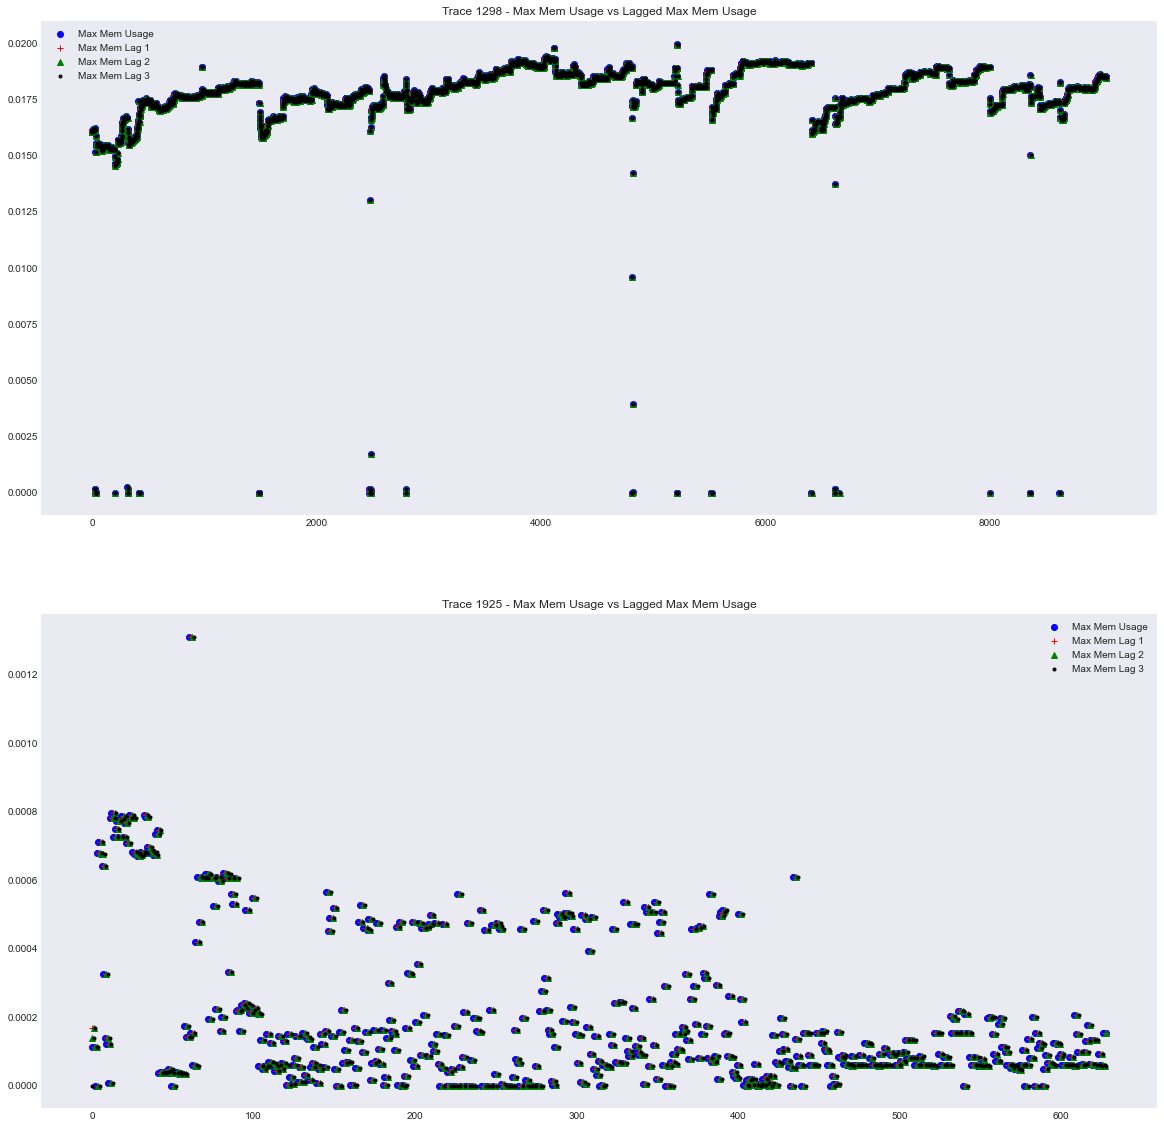

In [32]:
plot_lags_1298_and_1925(max_1298, max_1925, lag_1298_dfs, lag_1925_dfs, "maximum_usage.memory_lag", "Max Mem")

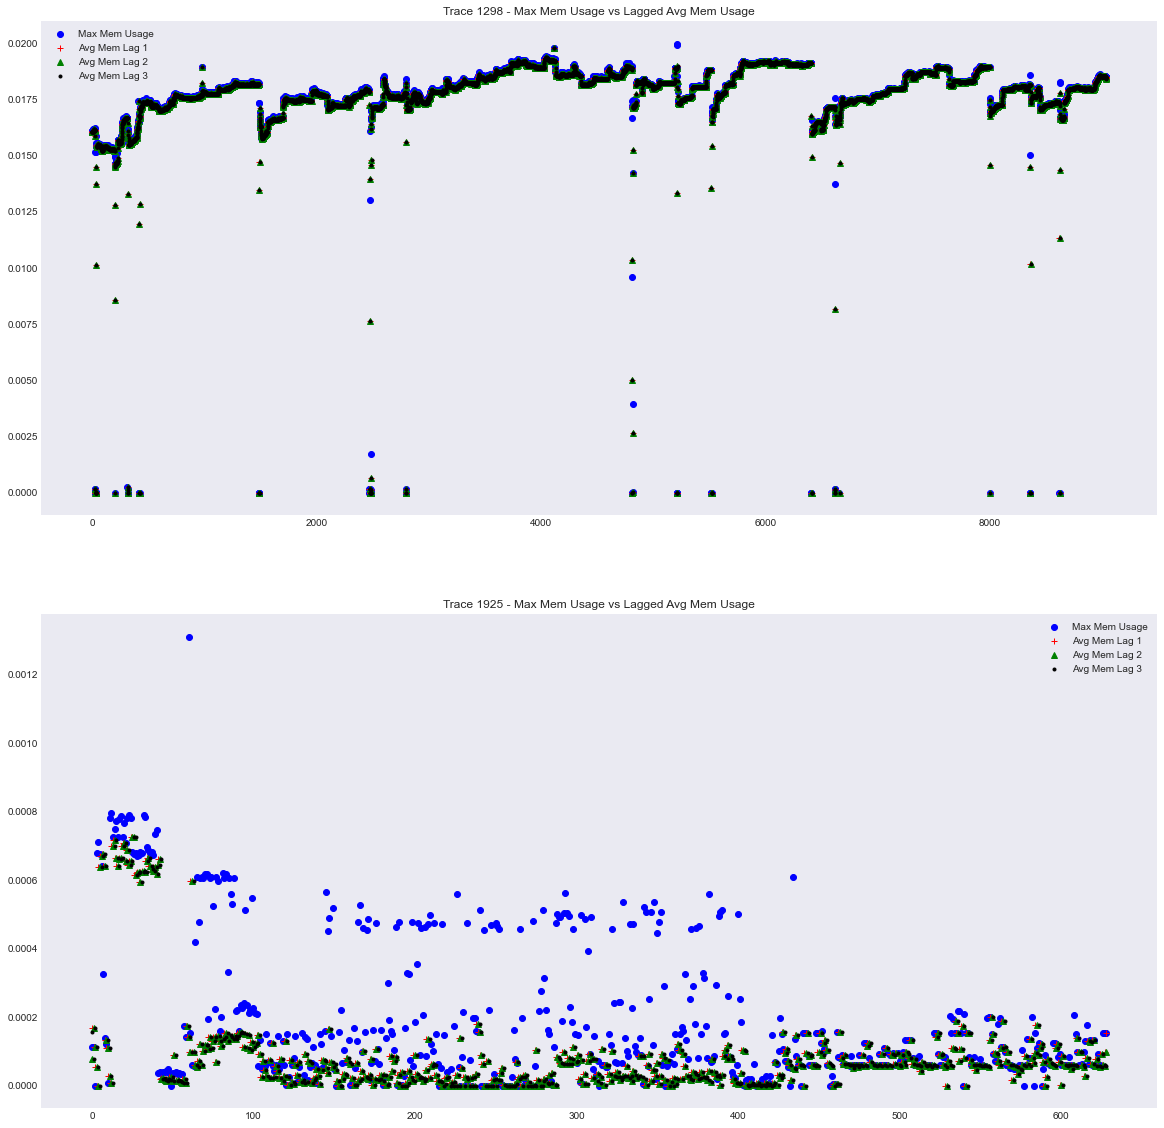

In [33]:
plot_lags_1298_and_1925(max_1298, max_1925, lag_1298_dfs, lag_1925_dfs, "average_usage.memory_lag", "Avg Mem")

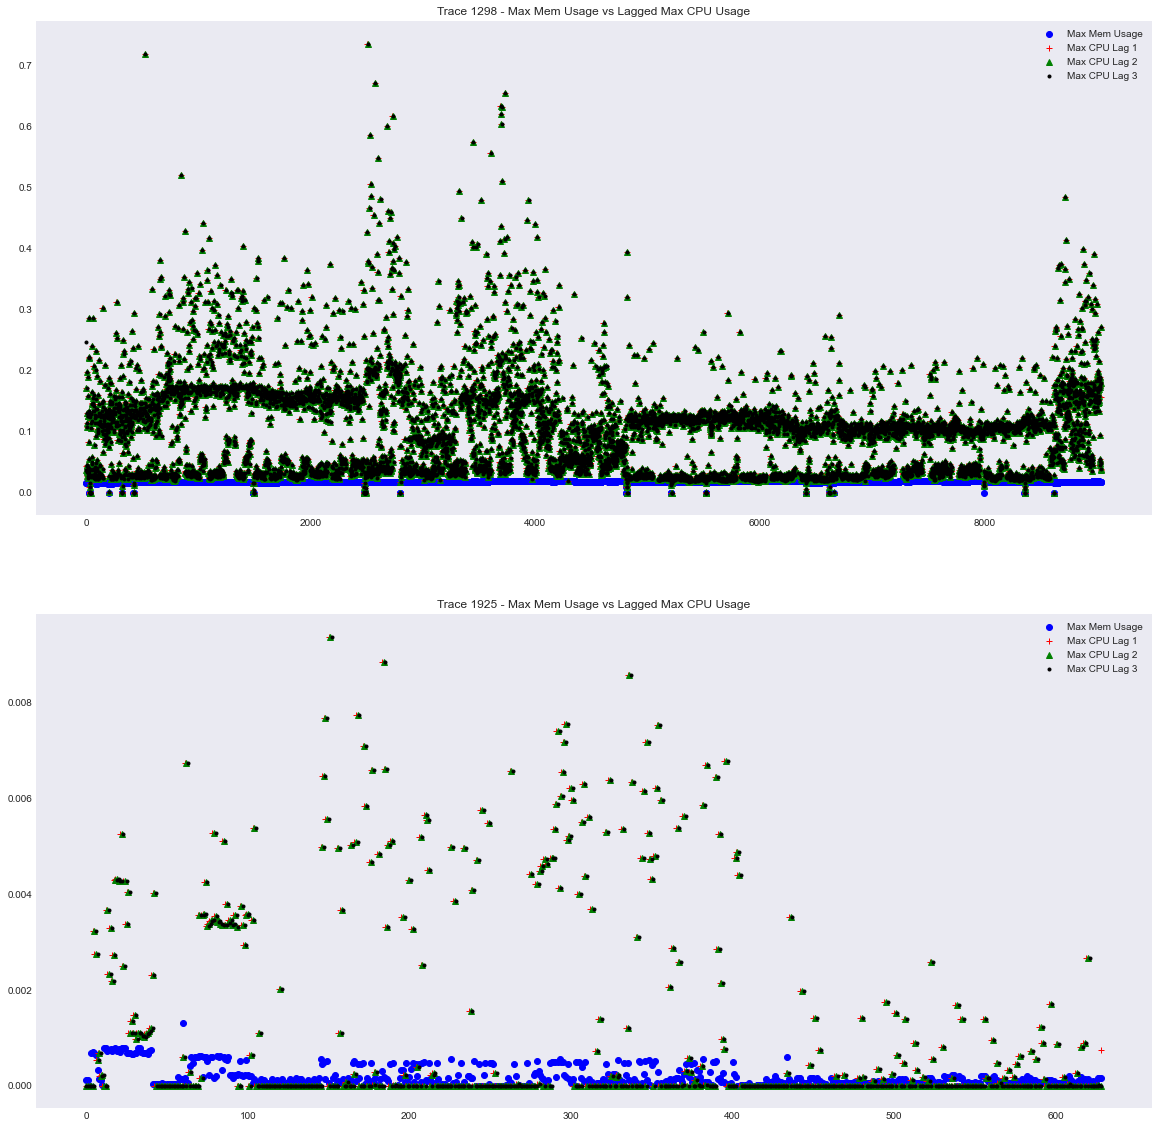

In [34]:
plot_lags_1298_and_1925(max_1298, max_1925, lag_1298_dfs, lag_1925_dfs, "maximum_usage.cpus_lag", "Max CPU")

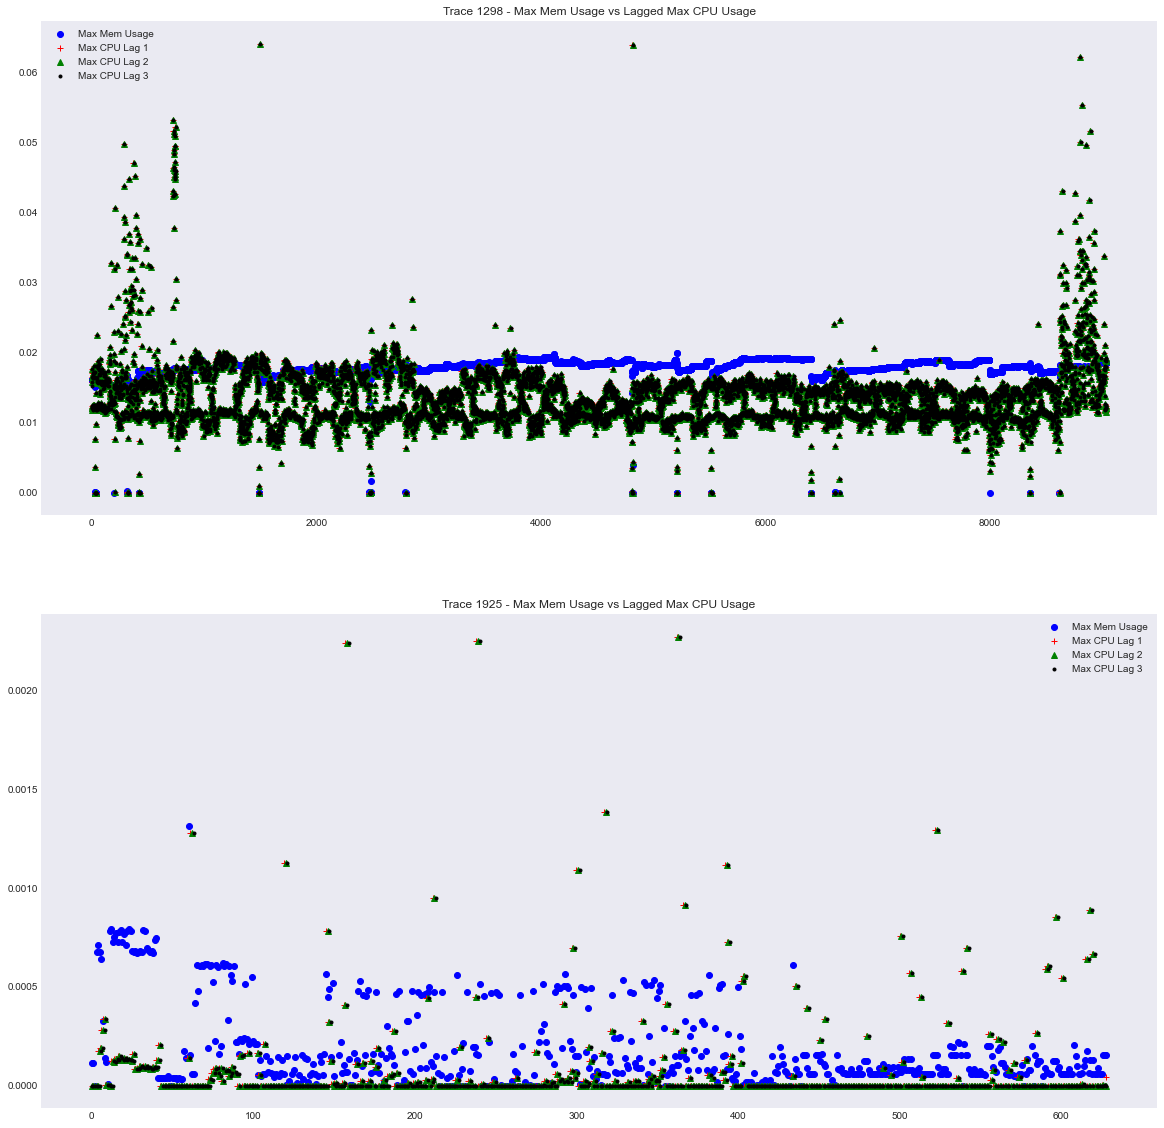

In [35]:
plot_lags_1298_and_1925(max_1298, max_1925, lag_1298_dfs, lag_1925_dfs, "average_usage.cpus_lag", "Max CPU")

### Regression
It seems that the past values of CPU and memory influence the current value of max memory usage. So we try a simple regression model based on this.

We also want to see how well our model holds up in the future and will not be able to refit at every time interval. So to create a training and testing set we perform a train-test split at 70%-30%, where the first 70% of data points are training and the rest are validation.

In [36]:
feature_cols = ["average_usage.cpus_lag", "average_usage.memory_lag", "maximum_usage.cpus_lag", "maximum_usage.memory_lag", "lag1"]
X_vars = ["avg_cpu1", "avg_mem1", "max_cpu1", "max_mem1"]
y_var = "max_mem"

lag_1298_data = lag_1298_dfs[0][feature_cols]
lag_1298_data.columns = X_vars + [y_var]

lag_1925_data = lag_1925_dfs[0][feature_cols]
lag_1925_data.columns = X_vars + [y_var]

In [37]:
train_idx_1298 = int(len(lag_1298_data) * 0.7)
train_idx_1925 = int(len(lag_1925_data) * 0.7)

train_df = pd.concat([lag_1298_data[:train_idx_1298], lag_1925_data[:train_idx_1925]], axis=0)
test_df = pd.concat([lag_1298_data[train_idx_1298:], lag_1925_data[train_idx_1925:]], axis=0)

X_train = train_df[X_vars]
y_train = train_df[y_var]
X_test = test_df[X_vars]
y_test = test_df[y_var]

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
test_preds = reg_model.predict(X_test)
train_preds = reg_model.predict(X_train)

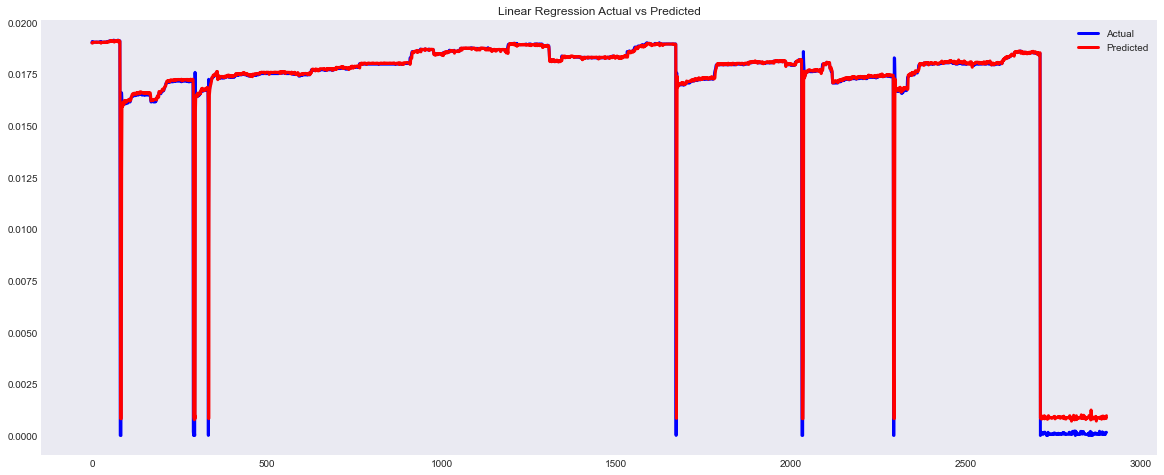

In [40]:
plt.figure(figsize=(20, 8))
plt.plot(y_test.to_numpy(), color="blue", linewidth=3, label="Actual")
plt.plot(test_preds, color="red", linewidth=3, label="Predicted")
plt.legend()
plt.title("Linear Regression Actual vs Predicted")
plt.show()

In [41]:
print("Train Mean Squared Error: {}".format(mean_squared_error(y_train, train_preds)))
print("Test Mean Squared Error: {}".format(mean_squared_error(y_test, test_preds)))

Train Mean Squared Error: 9.617106775009475e-07
Test Mean Squared Error: 1.13397194361618e-06


In [42]:
print("Regression Model Coefficients")
pd.DataFrame({"variables": X_vars,
              "coefficients": reg_model.coef_})

Regression Model Coefficients


,variables,coefficients
0,avg_cpu1,0.002526
1,avg_mem1,2.373114
2,max_cpu1,0.000072
3,max_mem1,-1.418182


We now repeat the modelling procedure but instead build a separate regression model for each trace

In [43]:
train_df_1298 = lag_1298_data[:train_idx_1298]
train_df_1925 = lag_1925_data[:train_idx_1925]
test_df_1298 = lag_1298_data[train_idx_1298:]
test_df_1925 = lag_1925_data[train_idx_1925:]

X_train_1298 = train_df_1298[X_vars]
y_train_1298 = train_df_1298[y_var]
X_test_1298 = test_df_1298[X_vars]
y_test_1298 = test_df_1298[y_var]

X_train_1925 = train_df_1925[X_vars]
y_train_1925 = train_df_1925[y_var]
X_test_1925 = test_df_1925[X_vars]
y_test_1925 = test_df_1925[y_var]

In [44]:
reg_model_1298 = LinearRegression()
reg_model_1298.fit(X_train_1298, y_train_1298)

train_preds_1298 = reg_model_1298.predict(X_train_1298)
test_preds_1298 = reg_model_1298.predict(X_test_1298)

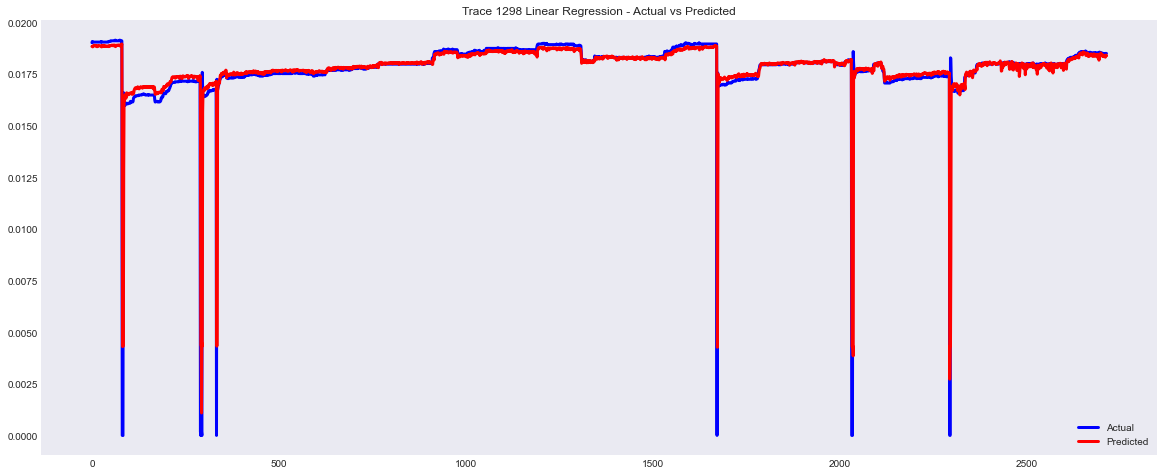

In [45]:
plt.figure(figsize=(20, 8))
plt.plot(y_test_1298.to_numpy(), color="blue", linewidth=3, label="Actual")
plt.plot(test_preds_1298, color="red", linewidth=3, label="Predicted")
plt.legend()
plt.title("Trace 1298 Linear Regression - Actual vs Predicted")
plt.show()

In [46]:
reg_model_1925 = LinearRegression()
reg_model_1925.fit(X_train_1925, y_train_1925)

train_preds_1925 = reg_model_1925.predict(X_train_1925)
test_preds_1925 = reg_model_1925.predict(X_test_1925)

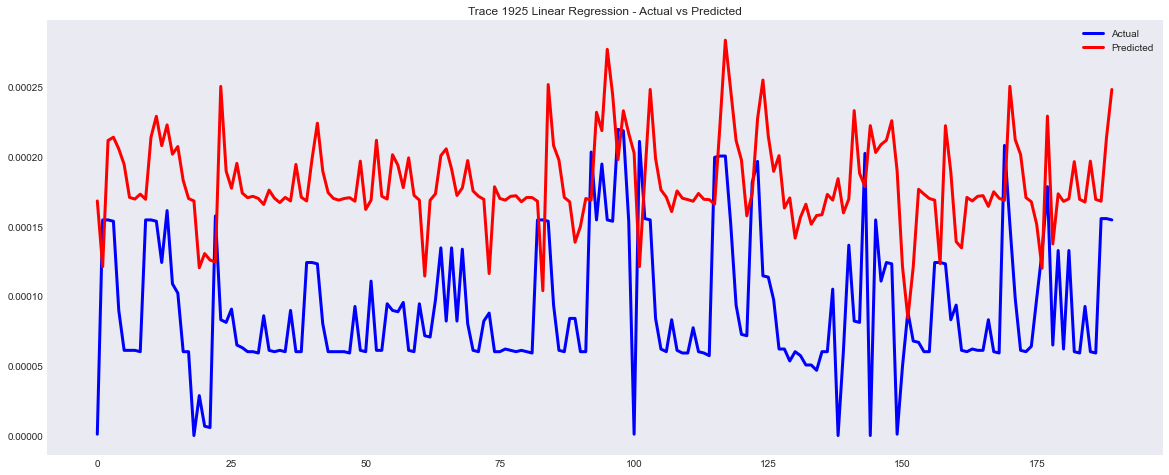

In [47]:
plt.figure(figsize=(20, 8))
plt.plot(y_test_1925.to_numpy(), color="blue", linewidth=3, label="Actual")
plt.plot(test_preds_1925, color="red", linewidth=3, label="Predicted")
plt.legend()
plt.title("Trace 1925 Linear Regression - Actual vs Predicted")
plt.show()

In [48]:
print("Trace 1298 Train Mean Squared Error: {}".format(mean_squared_error(y_train_1298, train_preds_1298)))
print("Trace 1298 Test Mean Squared Error: {}".format(mean_squared_error(y_test_1298, test_preds_1298)))

print()

print("Trace 1925 Train Mean Squared Error: {}".format(mean_squared_error(y_train_1925, train_preds_1925)))
print("Trace 1925 Test Mean Squared Error: {}".format(mean_squared_error(y_test_1925, test_preds_1925)))

Trace 1298 Train Mean Squared Error: 8.86546922222476e-07
Trace 1298 Test Mean Squared Error: 9.891281042233955e-07

Trace 1925 Train Mean Squared Error: 3.4077387436182e-08
Trace 1925 Test Mean Squared Error: 1.0097382155298717e-08


In [49]:
print("Trace 1298 Regression Model Coefficients")
pd.DataFrame({"variables": X_vars,
              "coefficients": reg_model_1298.coef_})

Trace 1298 Regression Model Coefficients


,variables,coefficients
0,avg_cpu1,-0.014780
1,avg_mem1,2.469811
2,max_cpu1,0.000440
3,max_mem1,-1.699567


In [50]:
print("Trace 1925 Regression Model Coefficients")
pd.DataFrame({"variables": X_vars,
              "coefficients": reg_model_1925.coef_})

Trace 1925 Regression Model Coefficients


,variables,coefficients
0,avg_cpu1,-0.119211
1,avg_mem1,0.614851
2,max_cpu1,0.006648
3,max_mem1,0.210674


We can see from above that fitting individualized models has slightly better performance than fitting a global model. However, the model for trace 1925 looks like it lags the actual values and overpredicts. So we will see if we can do better with more advanced models